In [368]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab

      age  sex     bmi  children  smoker  region      charges
0      19    1  27.900         0       1       1  16884.92400
1      18    0  33.770         1       0       1   1725.55230
2      28    0  33.000         3       0       1   4449.46200
3      33    0  22.705         0       0       2  21984.47061
4      32    0  28.880         0       0       2   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1328   23    1  24.225         2       0       3  22395.74424
1329   52    0  38.600         2       0       1  10325.20600
1330   57    1  25.740         2       0       1  12629.16560
1331   23    1  33.400         0       0       1  10795.93733
1332   52    1  44.700         3       0       1  11411.68500

[1333 rows x 7 columns]


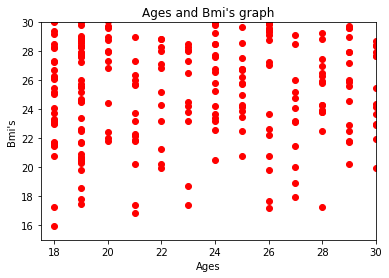

In [522]:
dataset = pd.read_csv('insurance.csv')
dataset = pd.DataFrame(dataset)
print(dataset)
plt.plot(dataset["age"], dataset["bmi"], "ro")
pylab.xlabel("Ages")
pylab.ylabel("Bmi's")
pylab.xlim(17.5, 30)
pylab.ylim(15, 30)
pylab.title("Ages and Bmi's graph")
plt.show()
y = dataset.values[:,6]
y = np.array([y]).T
dataset.drop('charges', inplace=True, axis=1)
dataset.insert(0, "bias", 1)
dataset = dataset.values
max1 = max(dataset[:,1])
max2 = max(dataset[:,3])
dataset[:,1] = dataset[:,1] / max1
dataset[:,3] = dataset[:,3] / max2

In [479]:
theta_init = np.array([[1000],[1500],[1000],[2000],[1000],[2000],[2000]])

In [352]:
def hypotesis(X, theta):
    return np.dot(X, theta)

In [519]:
def costFunction(X, y, theta):
    m = len(y)
    return (1/(2*m))*sum((hypotesis(X, theta)[0] - y)**2)

Sizes:
    dataset(X) : 1329 x 7
    theta : 7 x 1
    hypotesisResult : 1329 x 1
    7 * 1329 : 1329 * 1
    hypotesisResult = 7 * 1

In [354]:
def training(X, y, theta, alpha, iterations):
    J_history = np.zeros(iterations)
    hypotesisResult = (hypotesis(X, theta))
    m = len(y)
    for iter in range(iterations):
        theta = theta - (1/m) * alpha * (X.T.dot((hypotesisResult - y)))
        J_history[iter] = costFunction(X, y, theta)
    return J_history, theta

In [523]:
J_history, fitTheta = training(dataset, y, theta_init, 0.009, 30)

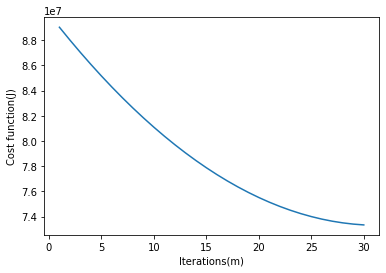

Last value of J: 73337277.27812245
Best value of J: 73337277.27812245
Position: 29


In [524]:
iterationsPlt = 30
pl.plot(np.arange(iterationsPlt)+1, J_history)
pylab.xlabel("Iterations(m)")
pylab.ylabel("Cost function(J)")
pl.show()
print("Last value of J: " + str(J_history[iterationsPlt - 1]))
print("Best value of J: " + str(min(J_history)))
print("Position: " + str(np.argmin(J_history, axis=0)))

In [525]:
print(hypotesis(np.array([1,52/max1,0,38.6/max2,2,0,1]) ,fitTheta)[0])
print(hypotesis(np.array([1,57/max1,1,25.74/max2,2,0,1]) ,fitTheta)[0])
print(hypotesis(np.array([1,23/max1,1,33.4/max2,0,0,1]) ,fitTheta)[0])
print(hypotesis(np.array([1,52/max1,1,44.7/max2,3,0,1]) ,fitTheta)[0])
print(hypotesis(np.array([1,18/max1,1,31.92/max2,0,0,3]) ,fitTheta)[0])

14738.840747766368
15733.315674241443
10256.663286993387
18829.7106339577
17637.160292195535


In [526]:
print(fitTheta)

[[2284.79186455]
 [2476.31502157]
 [1483.40089897]
 [2819.22852871]
 [2283.78568165]
 [3220.3824463 ]
 [3826.2460575 ]]
